# Week 8 Lab Assignment: Neural Networks and Overfitting

### Objective
In this lab, you will build a simple neural network using Python and TensorFlow/Keras. You will learn to train the network on a dataset, evaluate its performance, and apply techniques to prevent overfitting.

### 1. Setup and Installations
**Objective:** Ensure all necessary packages are installed and imported for the lab.

**Tasks:**
1. Install required Python packages: TensorFlow, Keras, pandas, numpy, matplotlib.

In [10]:
# Install necessary packages
%pip install tensorflow keras pandas numpy matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



### 2. Import Libraries
**Objective:** Import all necessary libraries for data manipulation, neural network building, and evaluation.


In [11]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
%matplotlib inline

### 3. Load and Explore Dataset
**Objective:** Gain a preliminary understanding of the dataset to be used for training the neural network.

**Tasks:**
1. **Load the Dataset:** Import the dataset into a Pandas DataFrame.
2. **Inspect the Data:** Use Pandas functions to inspect the first few rows, check for missing values, and understand the data types.
3. **Summary Statistics:** Generate summary statistics for numerical columns.

In [12]:
# Load the dataset
df = pd.read_csv('neural_network_data.csv')

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Generate summary statistics
print(df.describe())

   Age  Annual_Income  Spending_Score  Years_with_Company  Target
0   25          50000              39                   1       0
1   32          60000              81                   3       1
2   47         120000              63                  10       1
3   30          75000              56                   4       0
4   35          95000              72                   6       1
Age                   0
Annual_Income         0
Spending_Score        0
Years_with_Company    0
Target                0
dtype: int64
            Age  Annual_Income  Spending_Score  Years_with_Company     Target
count  25.00000      25.000000       25.000000           25.000000  25.000000
mean   38.04000   78840.000000       61.520000            6.200000   0.520000
std    10.13854   22632.351476       14.341432            3.162278   0.509902
min    22.00000   45000.000000       35.000000            1.000000   0.000000
25%    30.00000   60000.000000       50.000000            3.000000   0.000000
50%

### 4. Data Preparation
**Objective:** Prepare the data for training by normalizing features and splitting into training and test sets.

**Tasks:**
1. **Normalize Features:** Scale features to have zero mean and unit variance.
2. **Train-Test Split:** Split the data into training and testing sets.

Training set size: (17, 4)
Test set size: (8, 4)
(17, 4) (17,)
(8, 4) (8,)


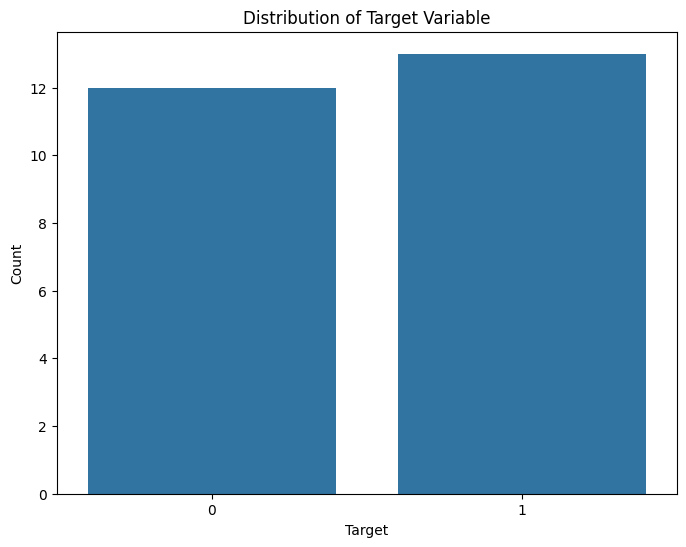

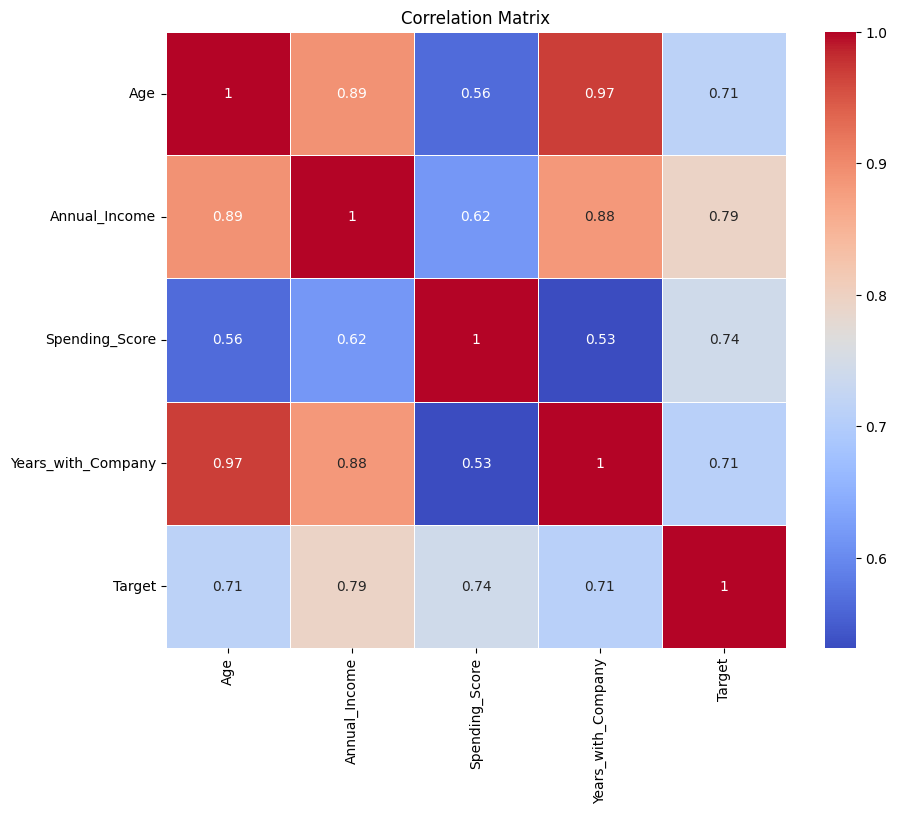

In [13]:
# Normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('Target', axis=1)
y = df['Target']
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 5. Building and Training a Neural Network
**Objective:** Build a simple neural network, train it on the dataset, and evaluate its performance.

**Tasks:**
1. **Build the Neural Network:** Define the architecture of the neural network using Keras.
2. **Train the Neural Network:** Compile the model, specify the optimizer, loss function, and metrics, and fit the model to the training data.

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.8641 - loss: 0.6389 - val_accuracy: 1.0000 - val_loss: 0.5640
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8308 - loss: 0.6121 - val_accuracy: 1.0000 - val_loss: 0.5378
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9487 - loss: 0.5894 - val_accuracy: 1.0000 - val_loss: 0.5144
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9154 - loss: 0.5690 - val_accuracy: 1.0000 - val_loss: 0.4919
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.5369 - val_accuracy: 1.0000 - val_loss: 0.4705
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.5201 - val_accuracy: 1.0000 - val_loss: 0.4512
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.4956 - val_accuracy: 1.0000 - val_loss: 0.4326
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.4785 - val_accuracy: 1.0000 - val_loss: 0.4137


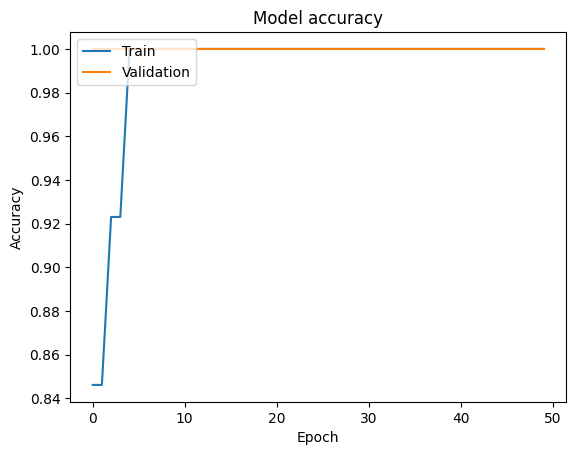

In [16]:
# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=10, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



### 6. Preventing Overfitting
**Objective:** Implement dropout, regularization, and early stopping to prevent overfitting.

**Tasks:**
1. **Add Dropout:** Integrate dropout layers into the neural network to reduce overfitting.
2. **Apply Regularization:** Use L2 regularization to penalize large weights.
3. **Early Stopping:** Implement early stopping to halt training when validation performance degrades.

Epoch 1/50


C:\Users\jason\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.6103 - loss: 1.2409 - val_accuracy: 0.2500 - val_loss: 1.2616
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3897 - loss: 1.3124 - val_accuracy: 0.5000 - val_loss: 1.2335
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4410 - loss: 1.2600 - val_accuracy: 0.5000 - val_loss: 1.2065
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4410 - loss: 1.2791 - val_accuracy: 0.5000 - val_loss: 1.1814
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5769 - loss: 1.1638 - val_accuracy: 0.5000 - val_loss: 1.1572
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5256 - loss: 1.1330 - val_accuracy: 0.5000 - val_loss: 1.1329
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5590 - loss: 1.0955 - val_accuracy: 0.5000 - val_loss: 1.1092
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6436 - loss: 1.0540 - val_accuracy: 0.5000 - val_loss: 1.0874
Epoch 9/50

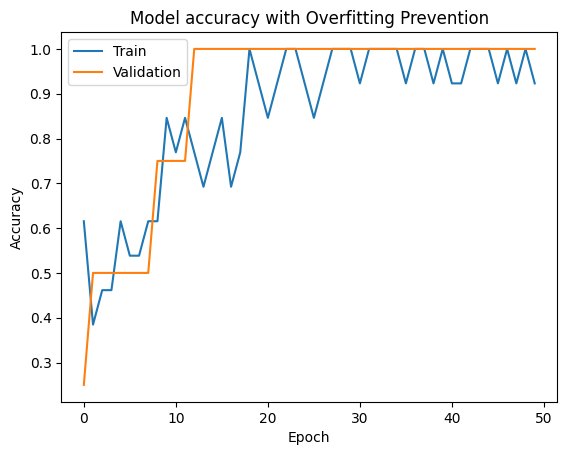

In [15]:
# Rebuild the neural network with dropout and regularization
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=10, verbose=1, callbacks=[early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with Overfitting Prevention')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### 7. Submission
**Deliverables:**
- Jupyter Notebook (.ipynb) with all code and model evaluations.
- A brief report (1-2 paragraphs) summarizing the findings, comparing model performance, and discussing the impact of overfitting prevention techniques.

**Deadline:** Submit your completed notebook and report to the course portal by the end of class.